In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint

from IPython.display import Image

Using TensorFlow backend.


Load the IMDB dataset

In [2]:
number_of_features = 5000
(X_train, y_train), (X_val, y_val) = imdb.load_data(num_words = number_of_features)

Convert movie review data to a feature matrix

In [3]:
tokenizer = Tokenizer(num_words=number_of_features)

In [4]:
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_val = tokenizer.sequences_to_matrix(X_val, mode='binary')

In [5]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Check the number of possible labels

In [6]:
np.unique(y_train)

array([0, 1])

Example 1: Create a multi-layer perceptron model

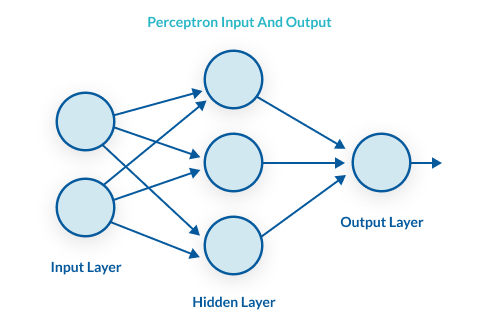

In [7]:
Image(filename='multilayer-perceptron.png')

Instantiate a model using the Sequential API

In [8]:
model = Sequential()

In [9]:
model.add(Dense(16, activation='relu', input_shape=(number_of_features,)))

In [10]:
model.add(Dropout(0.5))

In [11]:
model.add(Dense(16, activation='relu'))

In [12]:
model.add(Dropout(0.5))

Output layer: A single neuron output layer using a sigmoid activation function to create a binary output

In [13]:
model.add(Dense(1, activation='sigmoid'))

Compile the model and specify the loss, optimizer, and which metrics to track

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80016     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________
None


Prevent the model from overfitting by monitoring the validation set accuracy

In [16]:
es = EarlyStopping(monitor='val_accuracy', patience=2)

Save the best model

In [17]:
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

Train the model with validation

In [18]:
model.fit(X_train, # Features 
          y_train, # Target vector
          epochs=10, # Number of epochs
          callbacks=[es, mc], # Early stopping
          verbose=1, # Print description after each epoch
          batch_size=100, # Number of observations per batch
          validation_data=(X_val, y_val)) # Data for evaluation

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s 64us/step - loss: 0.5346 - accuracy: 0.7223 - val_loss: 0.3266 - val_accuracy: 0.8740
Epoch 2/10
25000/25000 [==============================] - 1s 50us/step - loss: 0.3459 - accuracy: 0.8592 - val_loss: 0.2789 - val_accuracy: 0.8834
Epoch 3/10
25000/25000 [==============================] - 1s 49us/step - loss: 0.2950 - accuracy: 0.8832 - val_loss: 0.2911 - val_accuracy: 0.8788
Epoch 4/10
25000/25000 [==============================] - 1s 50us/step - loss: 0.2642 - accuracy: 0.8954 - val_loss: 0.2862 - val_accuracy: 0.8792


Evaluate the model

In [19]:
scores = model.evaluate(X_val, y_val, verbose=0)

In [20]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.92%
